# WeRateDog Data Analysis and Visualization Report. 
--- 

### By: Benjamin Adekunle Ojo. 

## Introduction: 
>
>The aim of this report is to communicate findings gotten from analysing the weratedog dataset, and interpreting
>visualization used in arriving at our conclusions. 

In [7]:
# Import pakages:

# Data Manipulation Pakages.
import pandas as pd 
import numpy as np

# Data Visualization Pakages. 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

# Other pakages. 
from IPython.display import Image 

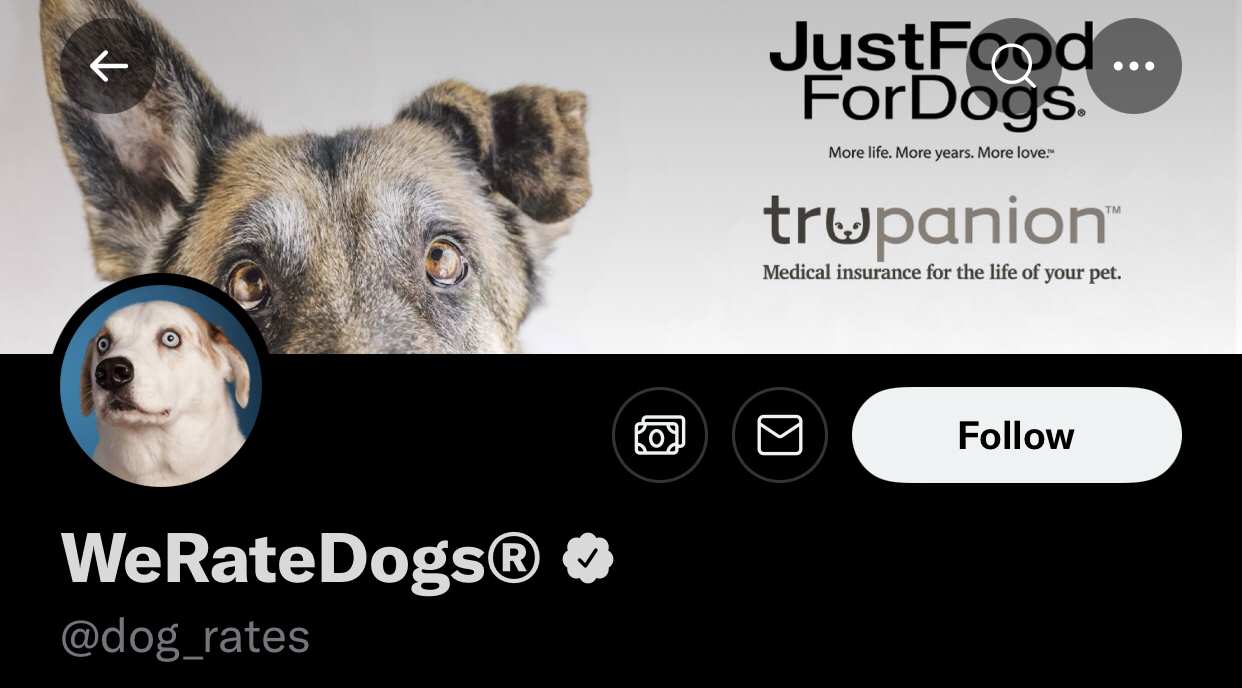

In [8]:
Image('weratedog_tweeter_acc.png')

In [2]:
# Loading Weratedog cleaned dataset

weratedog_data = pd.read_csv('weratedog_tweets_master.csv')

In [3]:
weratedog_data.head()

tweet_id            timestamp                       source  \
0  892177421306343426  2017-08-01 00:17:27  twitter.com/download/iphone   
1  891815181378084864  2017-07-31 00:18:03  twitter.com/download/iphone   
2  891327558926688256  2017-07-29 16:00:24  twitter.com/download/iphone   
3  891087950875897856  2017-07-29 00:08:17  twitter.com/download/iphone   
4  890971913173991426  2017-07-28 16:27:12  twitter.com/download/iphone   

                                                text  \
0  This is Tilly. She's just checking pup on you....   
1  This is Archie. He is a rare Norwegian Pouncin...   
2  This is Franklin. He would like you to stop ca...   
3  Here we have a majestic great white breaching ...   
4  Meet Jax. He enjoys ice cream so much he gets ...   

                                       expanded_urls  rating_numerator  \
0  twitter.com/dog_rates/status/89217742130634342...                13   
1  twitter.com/dog_rates/status/89181518137808486...                12   
2  twitter.com/dog_rates/status/89132755892668825...                12   
3  twitter.com/dog_rates/status/89108795087589785...                13   
4         gofundme.com/ydvmve-surgery-for-jax,https:                13   

   rating_denominator      name dog_stage  favorite_count  ...  \
0                  10     Tilly       NaN           29321  ...   
1                  10    Archie       NaN           22042  ...   
2                  10  Franklin       NaN           35308  ...   
3                  10      None       NaN           17803  ...   
4                  10       Jax       NaN           10361  ...   

   confid_probability_1 image_dog_1      Prediction_2 confid_probability_2  \
0              0.323581        True          Pekinese             0.090647   
1              0.716012        True          malamute             0.078253   
2              0.555712        True  English_springer             0.225770   
3              0.425595        True     Irish_terrier             0.116317   
4              0.341703        True     Border_collie             0.199287   

   image_dog_2                 Prediction_3 confid_probability_3  image_dog_3  \
0         True                     papillon             0.068957         True   
1         True                       kelpie             0.031379         True   
2         True  German_short-haired_pointer             0.175219         True   
3         True              Indian_elephant             0.076902        False   
4         True                    ice_lolly             0.193548        False   

   confidence_max                breed_type  
0        0.323581                 Chihuahua  
1        0.716012                 Chihuahua  
2        0.555712                    basset  
3        0.425595  Chesapeake_Bay_retriever  
4        0.341703               Appenzeller  

[5 rows x 24 columns]

## Analysis and Visalization

>Upon completing cleaning the dataset and exporting the cleaned data, I moved to analysing my data for possible insight >research questions, of which we analysis using data tables and visualizations, and the following are questions we analysis; 
>
>1. What is the relationship between favourite_count and retweet_count? 
>2. Does there exist a ralationship between rating and favourite_count ?
>3. What breed of dogs have the highest rating, retweet, and favourite_count ?

### `1.` **What is the Relationship Between `favourite_count` and `retweet_count`**
> 
> For this analysis we will be looking at the relationship that exist betweet favourite count of a tweet and it retweet rate. Getting an insight on how much a tweet is retweeted base on the rate at which it is like by views. for this analysis we will be using the following data: 
> * `favourite_count`
> * `retweet_count`

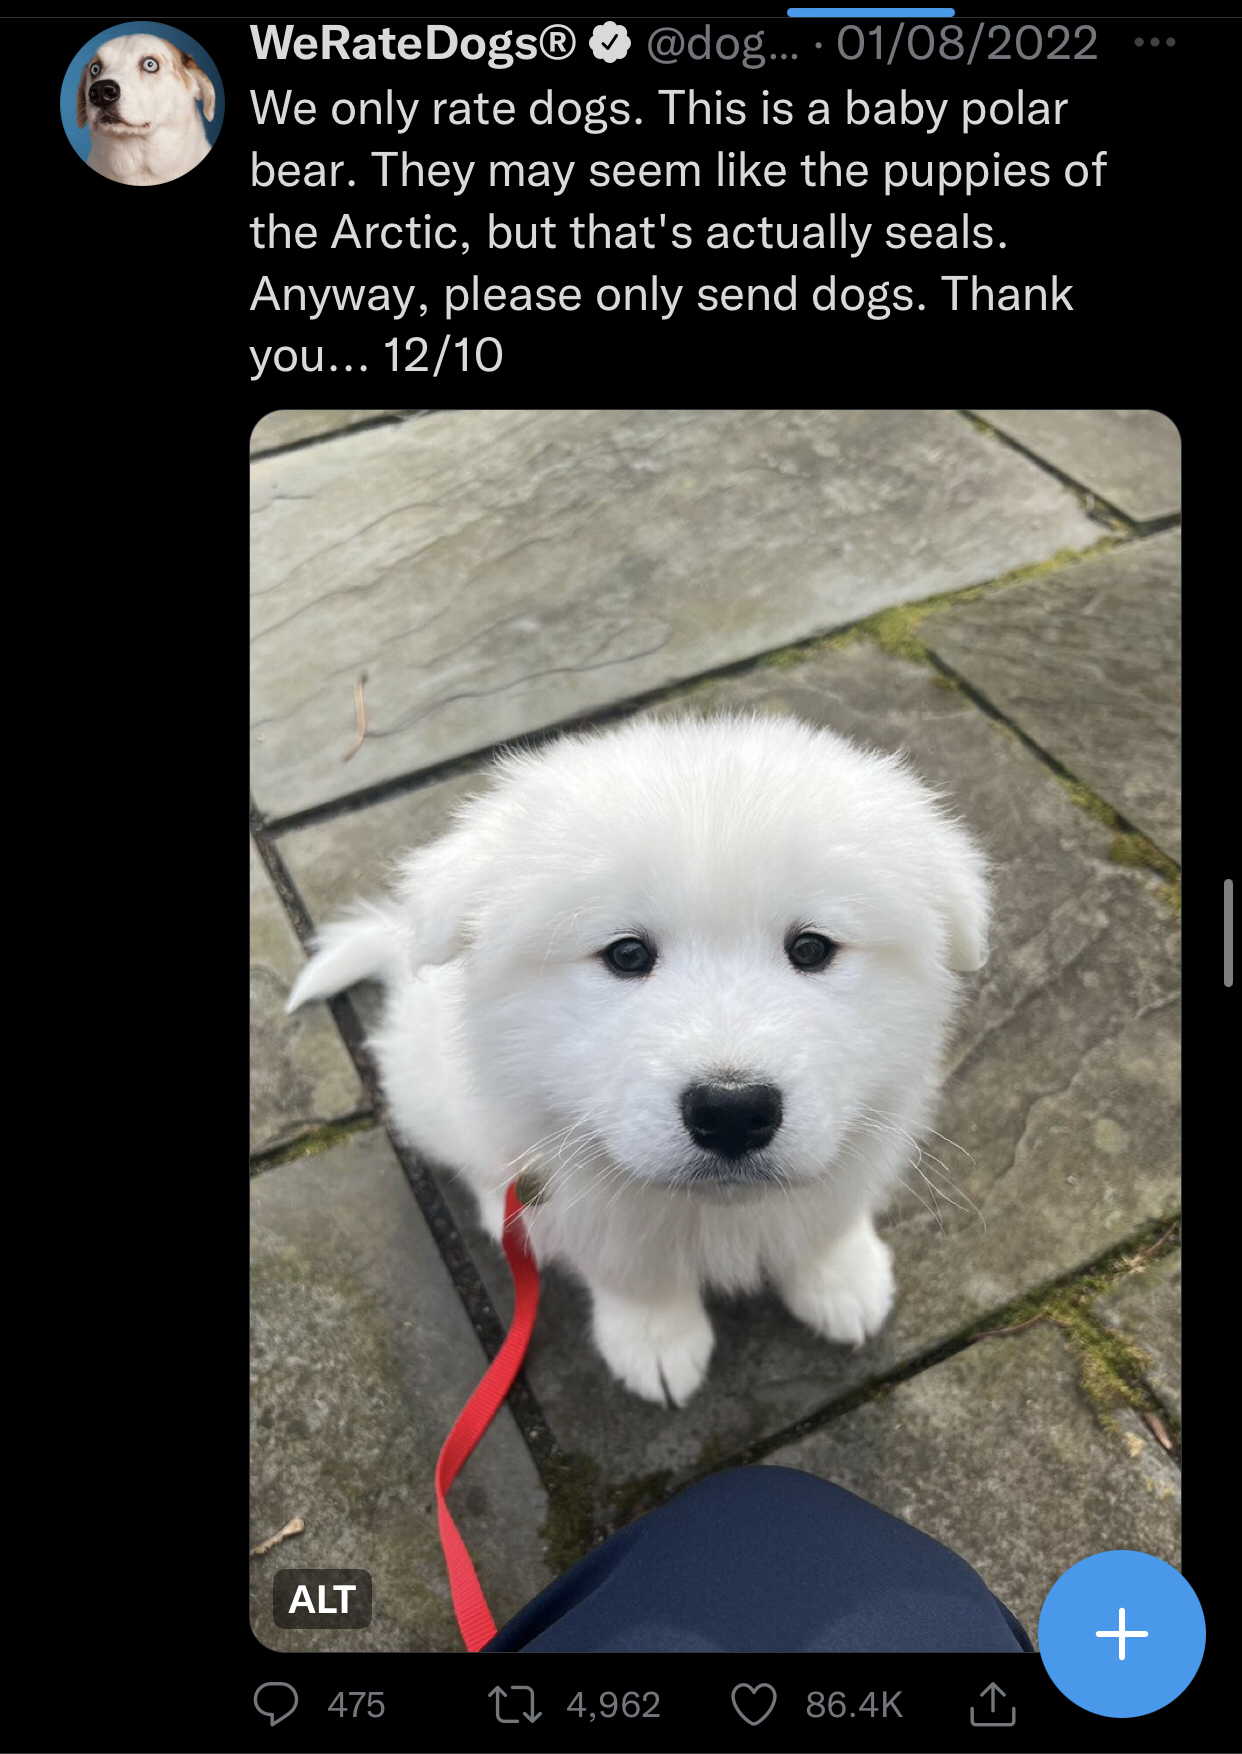

In [12]:
Image('weratedog_pic_2.png')

### Visualization: 

In [10]:
# Calculating the correlation between favorite_count and retweet. 
corr_df = weratedog_data[['favorite_count', 'retweet_count']]

corr = corr_df.corr()

# Viewing the correlation in tabluar formate
corr.style.background_gradient()

<Figure size 1440x1080 with 0 Axes>

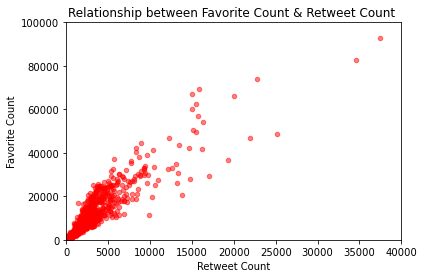

In [9]:
# Plotting Scatter plot for a better visualization

# Graph Size 
plt.figure(figsize = (20, 15))

# Plotting the scatter plot 
weratedog_data.plot(kind= 'scatter', x= 'retweet_count', y = 'favorite_count', alpha=0.5, c = 'red')

# setting annotation 
plt.ylim((0, 100000))
plt.xlim((0, 40000))
plt.ylabel('Favorite Count')
plt.xlabel('Retweet Count')
plt.title('Relationship between Favorite Count & Retweet Count ')
plt.show()

### Findings:
> From our analsys and visalization above we can observe that there seem to be a positive relationship between the rate at which a tweet is liked by followers and the rate at which it is retweeted, although this confirms our initial premise that tweets with high favourite count are also more likely to have a high retweet count. The correleation rate computed shows that there is a stronge correlation of 86% percent. 
>
> To highlight the point we got from computing the correlation, we plotted a scatter plot showing the relationship betwrite ceen favorite count and retweet count. As expected it shows a positive relationship between the rate favourite count and retweet, but we also discovered that not all retweet with a high count also have high favorite count and this make sense in that not all tweet that have hight retweet and can a high favo

### `2.` Does there exist a ralationship between `dog_rating` and `favourite_count`?
> 
> From our previous insight we discovered there is a postitive relationship between the rate at which people like tweets and the how much they share it to other by retweeting the inital tweet, but this was to just establish that there is a relationship between tweets like and retweet rate. 
>
> In this new insighful analyssi we will be looking at the relationship between the dog rating and the favourite count of each dog. Understanding this relationship will help us know how fair the rating by people is to what people feel about the dog in the tweets. For this analysis we will be making use of the following data:
>
> * `favorite_count`
> * `dog_rating`

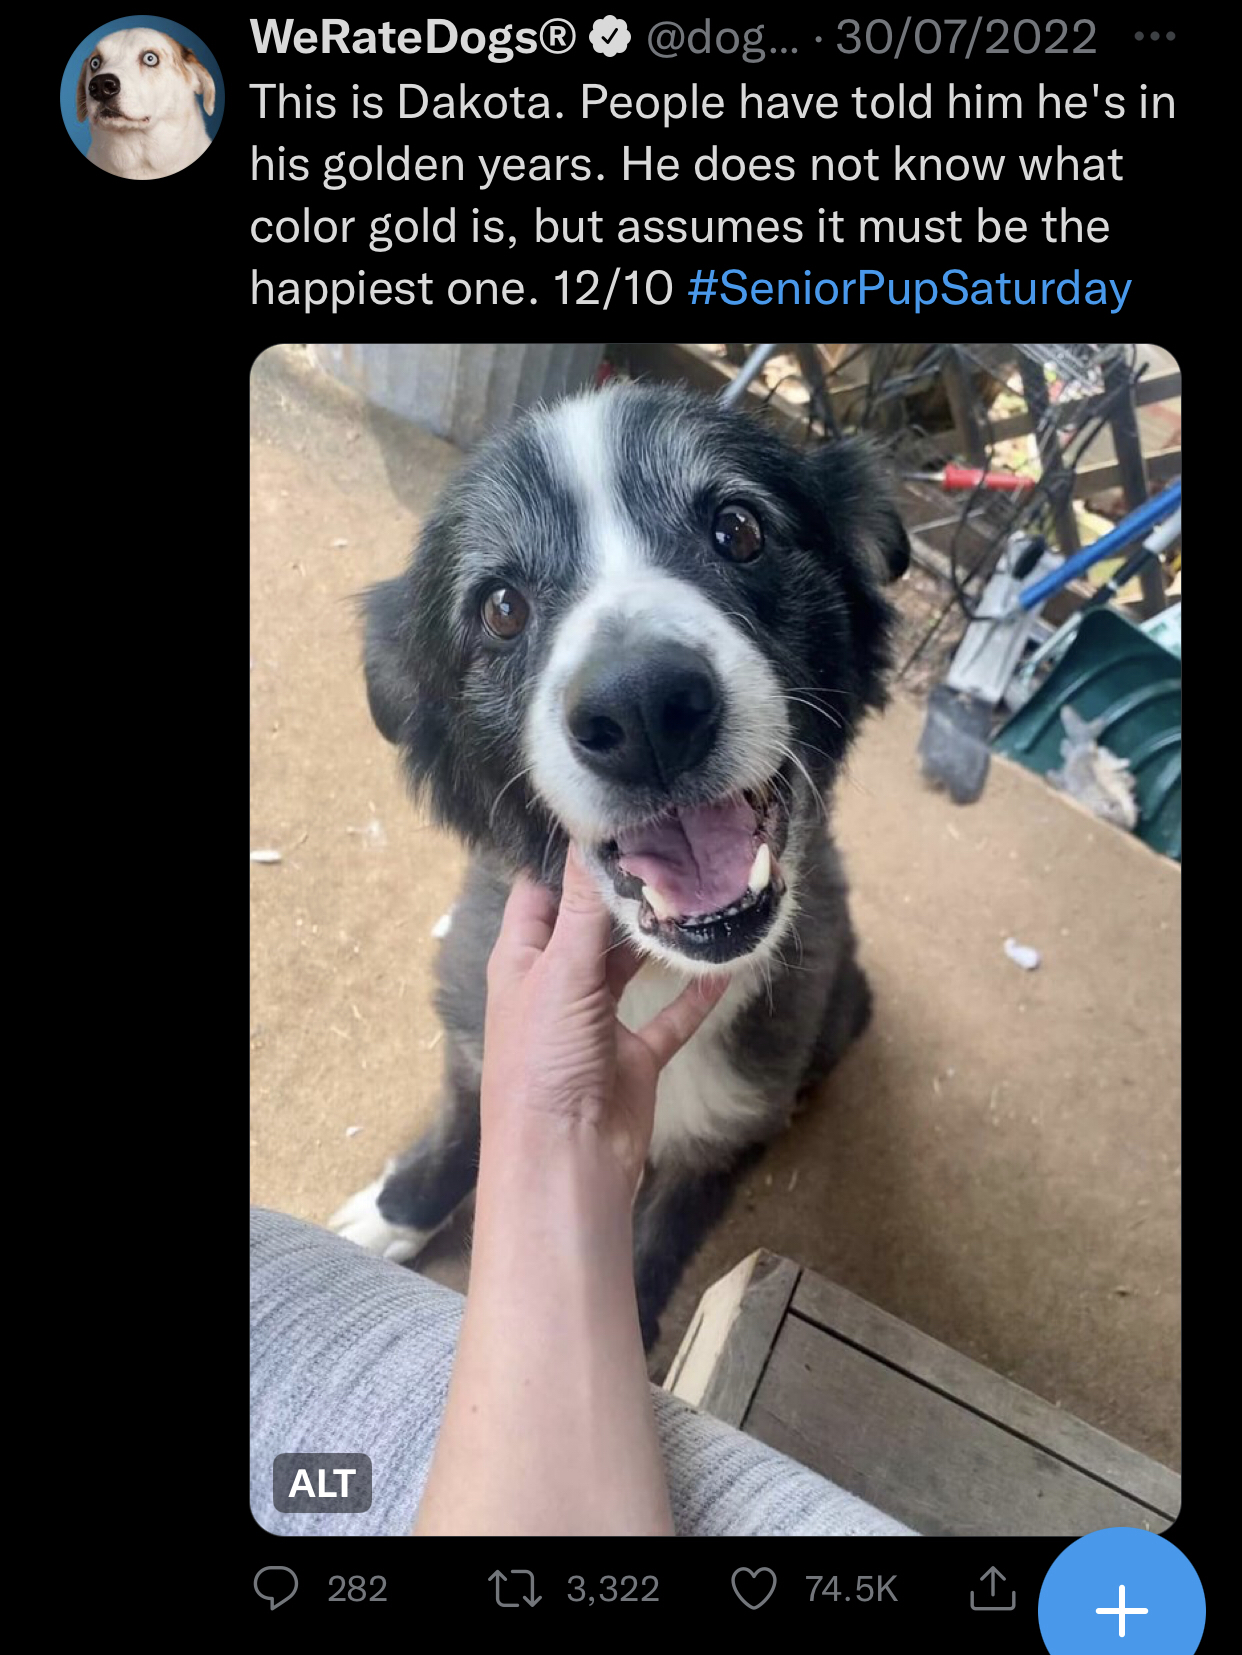

In [20]:
Image('weratedog_pic_3.png')

### Visualization: 


In [21]:
# Weratedog Data subset. 
dog_fvra = weratedog_data[['tweet_id', 'favorite_count', 'rating_numerator', 'retweet_count']]

In [22]:
# Removing dog rating that are greater than 15.00
# As this data set are outlier, and removing them woundn't significantly affect
# the size of the 

dog_fvra = dog_fvra[dog_fvra['rating_numerator'] <= 15.99]


In [23]:
# Identifing the correlation between dog rating and favorite count
fvra_corr_df = dog_fvra[['rating_numerator', 'favorite_count']]

fvra_corr = fvra_corr_df.corr()

=fvra_corr.style.background_gradient()

<Figure size 2500x2500 with 0 Axes>

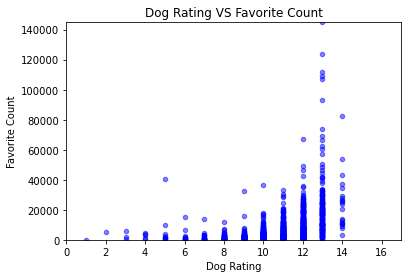

In [26]:
# Plotting Scatter Plot

# Plot Size
plt.figure(figsize=(10,10), dpi=250)

# Scatter Plot 
dog_fvra.plot(kind = 'scatter', x = 'rating_numerator', y = 'favorite_count', alpha = 0.5, color = 'b')

# Plot Annotation
plt.ylim((0, dog_fvra.favorite_count.max()+ 3))
plt.xlim((0, dog_fvra.rating_numerator.max()+3))
plt.ylabel('Favorite Count')
plt.xlabel('Dog Rating')
plt.title('Dog Rating VS Favorite Count')
plt.show()

### Findings: 
>
> Our analysis turns out to be very interesting from correlation and plot, we can obserse that there seems to be little correlation between this data point meaning that neither the rating nor the favorite count is dependent on the other but there still a positive relationship between the two data because the correlation value of 0.41 or 41% is low compare to our expection. This can also mean there is a bias with the rating system, although this is an assumption it gives room for further analysis. 
> 
> The scatter plot we generated show us that there is a positive relationship between the ratings and favorite count, this goes accouding to our expection and the correlation values. 

### `3.` What breed of dogs have the highest `rating`, `retweet`, and `favourite_count` ?
>
> This analysis aim at understanding what breed type people are most likly to get more retweet, rating, like count. Understating this can help us in predicting which breed of dogs are most likly to get a certain amount of likes , retweets, and rating. To conduct this anlysis we will be using Bar chars and the group by function in pandas. The following dataset would be used in this analysis and they are: 
> 
> * `Favorite Count`
> * `retweet count`
> * `dog_breed`
> * `dog_rating`

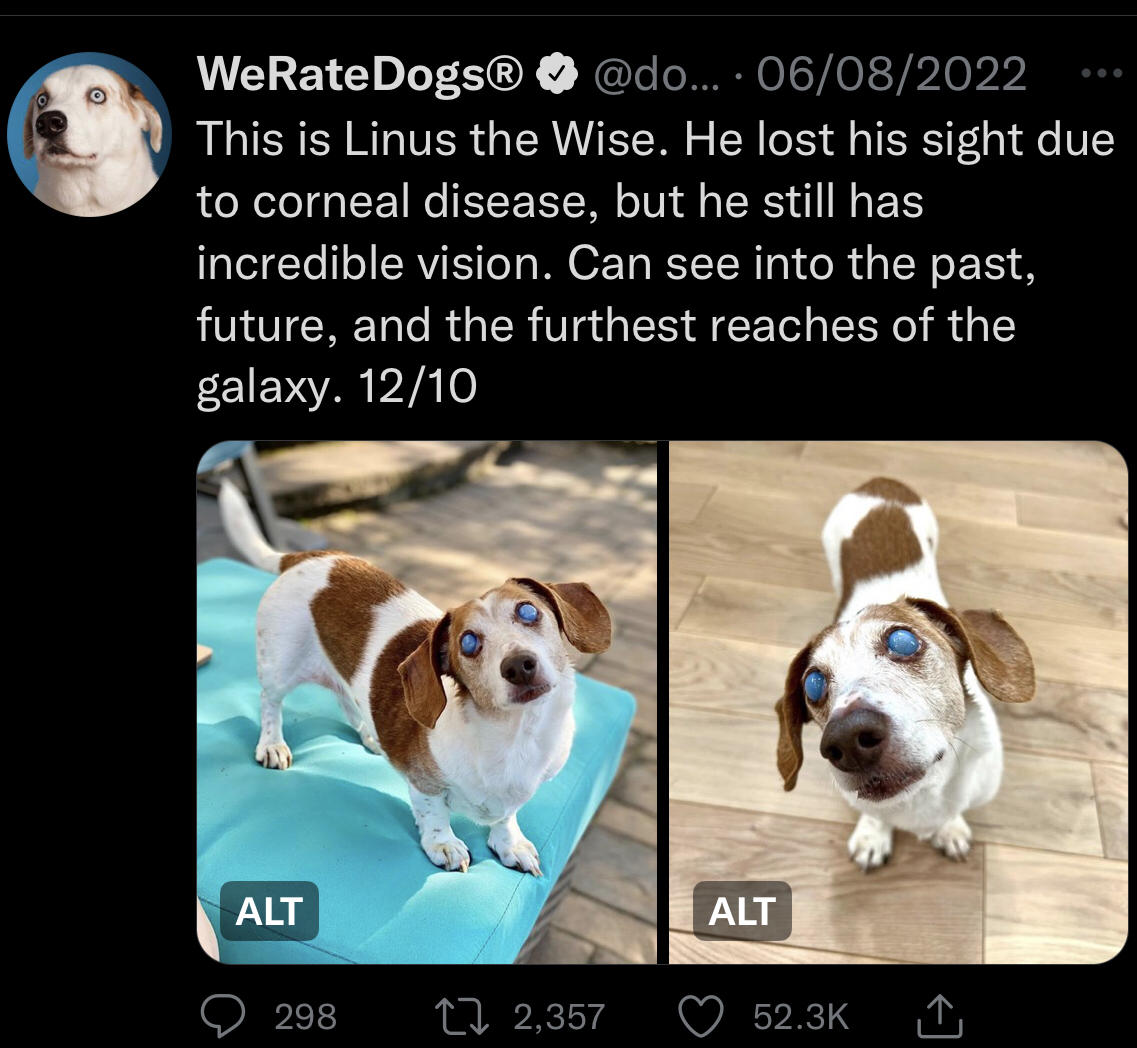

In [35]:
Image('weratedog_pic_1.png')

In [27]:
# Weratedog dataset subset. 
dog_breed = weratedog_data[['tweet_id', 'favorite_count', 'retweet_count', 'rating_numerator', 'breed_type']]


In [28]:
# Removing dog rating that are greater than 15.00
# As this data set are outlier, and removing them woundn't significantly affect
# the size of the 

dog_breed = dog_breed[dog_breed['rating_numerator'] <= 15.99]

In [29]:
# What breed of dogs are the most common 

most_common = dog_breed.groupby(['breed_type'])['tweet_id'].count().sort_values(ascending = False).head(20)

most_common 

breed_type
golden_retriever            129
Labrador_retriever           88
Pembroke                     85
Chihuahua                    76
pug                          53
chow                         40
Samoyed                      37
Pomeranian                   37
toy_poodle                   36
malamute                     29
cocker_spaniel               27
French_bulldog               25
Chesapeake_Bay_retriever     23
miniature_pinscher           21
German_shepherd              20
Siberian_husky               19
Maltese_dog                  18
Eskimo_dog                   18
Cardigan                     17
Shetland_sheepdog            17
Name: tweet_id, dtype: int64

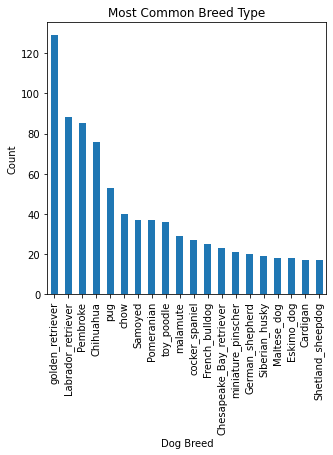

In [30]:
# Plotting a Bar Chart

# Plot Size 
plt.figure(figsize=(5,5))

# Bar Chart 
most_common.plot(kind= 'bar')

# Plot Annotation
plt.ylabel('Count')
plt.xlabel('Dog Breed')
plt.title('Most Common Breed Type')
plt.show()

### Findings: 
> It seems that Golden_retriever is the most common dog in our dataset or tweets, followed by Labrador_retriver, pembroke, chihuahua, pug, chow, etc. next we will be plotting this on a bar char 

#### Dog Breed and Like counts

In [229]:
breed_fav = dog_breed[['breed_type', 'favorite_count']] 
breed_fav2 = breed_fav.sort_values('favorite_count', ascending = False).groupby(['breed_type'], sort = False).sum()
breed_fav2.head(20)

favorite_count
breed_type                              
Labrador_retriever                898663
Lakeland_terrier                  187070
Chihuahua                         589311
French_bulldog                    408676
Eskimo_dog                        227244
English_springer                  121013
standard_poodle                    95418
golden_retriever                 1445911
Chesapeake_Bay_retriever          206969
Italian_greyhound                 118775
chow                              350249
Pembroke                          836976
Pomeranian                        247146
Rottweiler                        116625
boxer                              78329
cocker_spaniel                    268058
Samoyed                           440004
Saluki                             59045
toy_poodle                        199536
flat-coated_retriever             116158

In [230]:
breed_fav2.head()

favorite_count
breed_type                        
Labrador_retriever          898663
Lakeland_terrier            187070
Chihuahua                   589311
French_bulldog              408676
Eskimo_dog                  227244

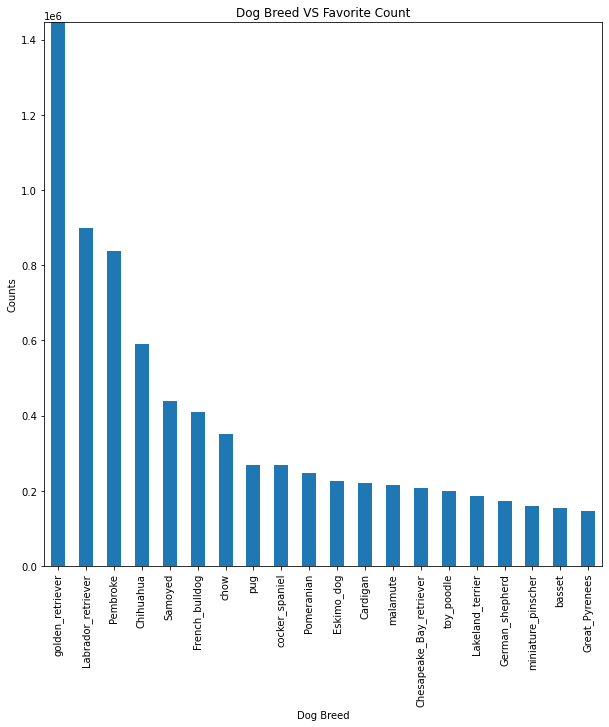

In [31]:
# Plotting a bar Chart showing the relationship between the variable. 

# Plot Size 
plt.figure(figsize=(5,5))

# Bar Chart 
breed_fav3 = dog_breed[['breed_type', 'favorite_count']] 
breed_fav3.head()
breed_fav_group = breed_fav3.groupby('breed_type')['favorite_count'].sum().sort_values(ascending = False).head(20)         
breed_fav_group.plot(kind= 'bar', figsize = (10, 10))

# Plot Annotation 
plt.ylim((0,breed_fav_group.max()))
plt.xlabel('Dog Breed')
plt.ylabel('Counts')
plt.title('Dog Breed VS Favorite Count')
plt.show()

### findings : 
> Dogs from the golden retriver breed seems to have the highest number of like or favorite by people. this is followed by the labrador retriver, pembroke, etc. 

#### Dog Breed and retweet counts

In [232]:
breed_ret = dog_breed[['breed_type', 'retweet_count']] 
breed_ret2 = breed_ret.sort_values('retweet_count', ascending = False).groupby(['breed_type'], sort = False).sum()
breed_ret2.head(20)

retweet_count
breed_type                             
Labrador_retriever               275614
Eskimo_dog                        79413
Chihuahua                        179936
Lakeland_terrier                  58664
English_springer                  43836
standard_poodle                   37888
French_bulldog                    98110
cocker_spaniel                    80495
golden_retriever                 400209
chow                              94171
toy_poodle                        70685
Rottweiler                        32954
flat-coated_retriever             29815
Chesapeake_Bay_retriever          52295
Pomeranian                        81317
boxer                             21882
Italian_greyhound                 29324
Pembroke                         215676
Samoyed                          139162
Great_Pyrenees                    50264

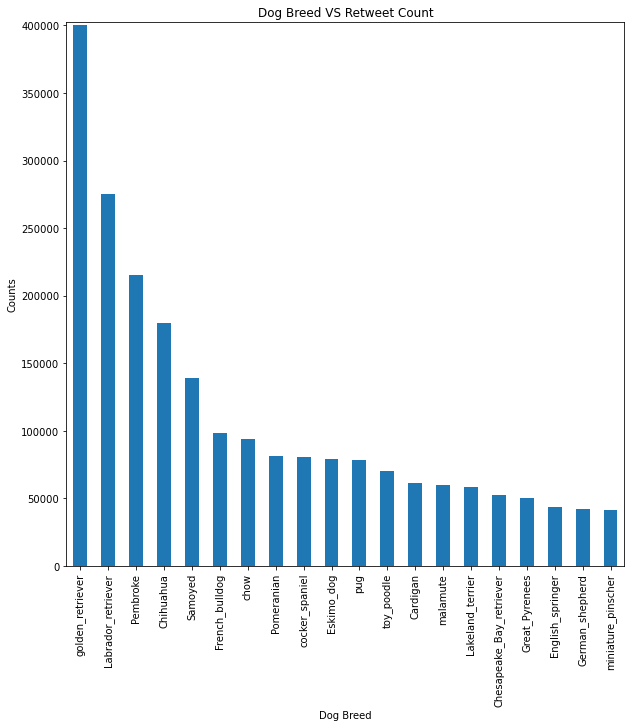

In [32]:
# Plotting a bar Chart showing the relationship between the variable. 

# Plot Size 
plt.figure(figsize=(5,5))

# Bar Chart 
breed_ret3 = dog_breed[['breed_type', 'retweet_count']] 
breed_ret3.head()
breed_ret_group = breed_ret3.groupby('breed_type')['retweet_count'].sum().sort_values(ascending = False).head(20)         
breed_ret_group.plot(kind= 'bar', figsize = (10, 10))

# Plot Annotation 
plt.ylim((0,breed_ret_group.max()+2000))
plt.xlabel('Dog Breed')
plt.ylabel('Counts')
plt.title('Dog Breed VS Retweet Count')
plt.show()

### Findings: 
> There seems to be a correlation between dog that appear the most and the like and retweet count, as the order in which dog breed type appears in the favorite appeared the same way in the retweet section.

#### Dog Breed and Dog Rating

In [234]:
breed_rating = dog_breed[['breed_type', 'rating_numerator']] 
breed_rating2 = breed_rating.sort_values('rating_numerator', ascending = False).groupby(['breed_type'], sort = False).sum()
breed_rating2.head(20)

rating_numerator
breed_type                               
black-and-tan_coonhound                21
golden_retriever                     1488
Bedlington_terrier                     50
bloodhound                             73
Pembroke                              973
Rottweiler                            192
French_bulldog                        281
Eskimo_dog                            212
Samoyed                               440
Pomeranian                            414
Irish_setter                           47
Gordon_setter                          47
standard_poodle                        72
Lakeland_terrier                      171
Old_English_sheepdog                  134
Chihuahua                             812
German_shepherd                       220
borzoi                                 85
briard                                 37
Border_terrier                         74

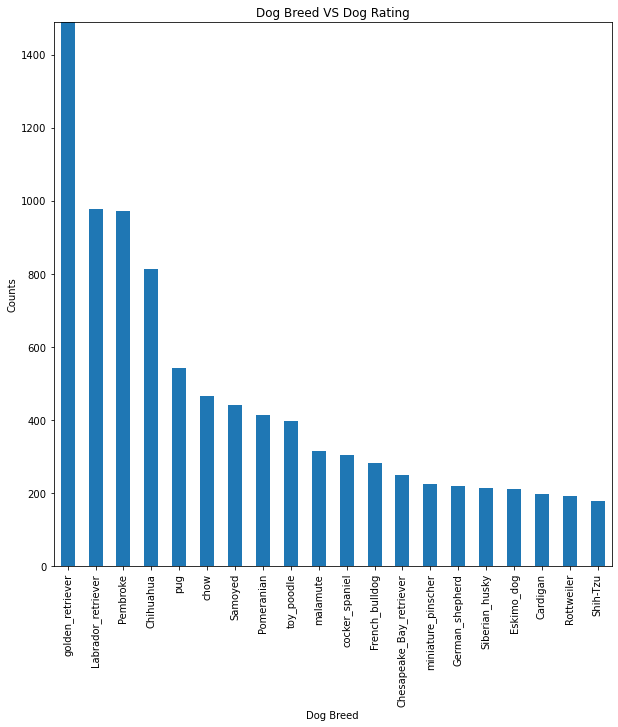

In [34]:
# Plotting a bar Chart showing the relationship between the variable. 

# Plot Size 
plt.figure(figsize=(5,5))

# Bar Chart 
breed_rating3 = dog_breed[['breed_type', 'rating_numerator']] 
breed_rating3.head()
breed_rating_group = breed_rating3.groupby('breed_type')['rating_numerator'].sum().sort_values(ascending = False).head(20)         
breed_rating_group.plot(kind= 'bar', figsize = (10, 10))

# Plot Annotation 
plt.ylim((0,breed_rating_group.max()))
plt.xlabel('Dog Breed')
plt.ylabel('Counts')
plt.title('Dog Breed VS Dog Rating')
plt.show()